In [1]:
# Importing common libraries
import pandas as pd
#pd.set_option('display.max_columns', None)
import numpy as np

# Importing libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Importing libraries for data modeling 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer



# Importing libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_excel('UK_GUIS_Q1_2019_final.xls')
data

,respondent_id,gender,age,knowledge_company,visit_frequency,knowledge_activity,satisfaction,booking_frequency,booking_preference,user_budget,...,subscription_browser,subscription_instagram,subscription_none,unsubscribed_newsletter,unsubscribed_messenger,unsubscribed_sms,unsubscribed_whatsapp,unsubscribed_app,unsubscribed_browser,unsubscribed_instagram
0,10605313822,Female,69,Google web search,Every day,They search the internet for travel deals and ...,Satisfied,Twice,Always online,"I am always in the ""middle"" when it comes to b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10605280047,Female,23,Friends/Family told me about it directly,A few times per month,They purchase travel deals from other provider...,Satisfied,"0 - I'm not a newbie, but haven't found/booked...",Always online,I am ok going above my typical budget range if...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10605004033,Female,24,Friends/Family told me about it directly,A few times per month,They search the internet for travel deals and ...,Satisfied,Once,Always online,"I¬†prefer budget travel, only going for the ch...",...,NaN,NaN,NaN,NaN,NaN,NaN,WhatsApp,NaN,NaN,NaN
3,10604334453,Female,24,Google web search,A few times per week,They search the internet for travel deals and ...,Very satisfied,0 - I'm a newbie to HolidayPirates,Always online,I am ok going above my typical budget range if...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10604300828,Female,46,Google web search,A few times per month,They search the internet for travel deals and ...,Satisfied,3 - 4 times,Sometimes online and sometimes offline,"I am always in the ""middle"" when it comes to b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,10538944302,Male,35,Friends/Family told me about it directly,Every day,They search the internet for travel deals and ...,Very dissatisfied,Twice,Sometimes online and sometimes offline,"I¬†prefer budget travel, only going for the ch...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3752,10538923163,Male,23,Friends/Family told me about it directly,A few times per week,They search the internet for travel deals and ...,Very satisfied,Once,Always online,I am ok going above my typical budget range if...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3753,10538922600,Female,23,Facebook,A few times per month,They search the internet for travel deals and ...,Satisfied,0 - I'm a newbie to HolidayPirates,Always online,"I am always in the ""middle"" when it comes to b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3754,10538908182,Female,21,Friends/Family told me about it directly,Every day,They purchase travel deals from other provider...,Very dissatisfied,0 - I'm a newbie to HolidayPirates,Sometimes online and sometimes offline,I am ok going above my typical budget range if...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['respondent_id', 'gender', 'age', 'knowledge_company',
       'visit_frequency', 'knowledge_activity', 'satisfaction',
       'booking_frequency', 'booking_preference', 'user_budget',
       'travel_motivation_languages', 'travel_motivation_business',
       'travel_motivation_shopping', 'travel_motivation_sightseeing',
       'travel_motivation_sports', 'travel_motivation_volunteering',
       'travel_motivation_photography', 'travel_motivation_food',
       'travel_motivation_relaxation', 'travel_motivation_wellness',
       'travel_motivation_parties', 'travel_motivation_familyfriends',
       'travel_motivation_adventure', 'travel_companion', 'travel_children',
       'leisure_domestic_ground_12', 'leisure_domestic_flight_12',
       'leisure_europe_12', 'leisure_intercontinental_12',
       'planning_time_leisure_domestic_car',
       'planning_time_leisure_domestic_flight', 'planning_time_leisure_europe',
       'planning_time_leisure_intercontinental', 'accomodation_hotel

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   respondent_id                           3756 non-null   int64 
 1   gender                                  3756 non-null   object
 2   age                                     3756 non-null   int64 
 3   knowledge_company                       3756 non-null   object
 4   visit_frequency                         3756 non-null   object
 5   knowledge_activity                      3755 non-null   object
 6   satisfaction                            3755 non-null   object
 7   booking_frequency                       3755 non-null   object
 8   booking_preference                      3755 non-null   object
 9   user_budget                             3755 non-null   object
 10  travel_motivation_languages             159 non-null    object
 11  trav

# 1: Data Cleaning

In [5]:
# Dealing with travel motivation by turning respondents who selected a motivation as a value = 1, and those
# who didn't choose certain motivation as a value = 0

for col in data.columns:
    if 'motivation' in col:
        data[col] = data[col].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [6]:
# Doing the same for different types of accomodation

for col in data.columns:
    if 'accomodation' in col:
        data[col] = data[col].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [7]:
# Same for different interests from respondents 

for col in data.columns:
    if 'interest' in col:
        data[col] = data[col].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [8]:
# Also for subscription to marketing channels

for col in data.columns:
    if 'subscription_' in col:
        data[col] = data[col].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [9]:
# Channels that respondents have unsubscribed from

for col in data.columns:
    if 'unsubscribed' in col:
        data[col] = data[col].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [10]:
# I will drop columns respresenting channels from which respondents unsubcribed from since
# very few people responded to this and the information is not very relevant

cols_to_remove = [col for col in data.columns if 'unsubscribed' in col]
data = data.drop(columns=cols_to_remove)

In [11]:
data = data.drop(columns='notifications_subscription')

In [12]:
# Checking remaining NaN's

data[data.columns[data.isnull().any()]].isnull().sum()

knowledge_activity                           1
satisfaction                                 1
booking_frequency                            1
booking_preference                           1
user_budget                                  1
travel_companion                             1
travel_children                           3179
leisure_domestic_ground_12                   6
leisure_domestic_flight_12                  99
leisure_europe_12                           28
leisure_intercontinental_12                 93
planning_time_leisure_domestic_car         418
planning_time_leisure_domestic_flight     1440
planning_time_leisure_europe               194
planning_time_leisure_intercontinental     569
spending_weekend_trip_2                      1
professional_status                          2
household_income                             2
level_education                              2
marital_status                               2
dtype: int64

In [13]:
# Cleaning up knowledge_activity variable

data['knowledge_activity'].value_counts()

They search the internet for travel deals and post them on the website/app so you can book it yourself    2971
I don't know                                                                                               269
They sell their own package, flight, and hotel deals directly to customers on the website/app              265
They purchase travel deals from other providers and sell them directly on the website/app                  250
Name: knowledge_activity, dtype: int64

In [14]:
data['knowledge_activity'] = data['knowledge_activity'].replace('They search the internet for travel deals and post them on the website/app so you can book it yourself','know')


In [15]:
data['knowledge_activity'] = data['knowledge_activity'].replace('They purchase travel deals from other providers and sell them directly on the website/app','know it wrong')


In [16]:
data['knowledge_activity'] = data['knowledge_activity'].replace('They sell their own package, flight, and hotel deals directly to customers on the website/app','know it wrong')

In [17]:
data['knowledge_activity'] = data['knowledge_activity'].replace("I don't know",'do not know')


In [18]:
data['knowledge_activity'].value_counts()

know             2971
know it wrong     515
do not know       269
Name: knowledge_activity, dtype: int64

In [19]:
# Filling travel_children Nan's with 0 since no answers represent people who don't travel with children

data['travel_children'] = data['travel_children'].fillna(0)

In [20]:
data['travel_children'].value_counts()

0            3196
1             249
2             241
3              53
4              14
5 or more       3
Name: travel_children, dtype: int64

In [21]:
data['leisure_domestic_ground_12'].value_counts()

2019-04-03 00:00:00    1171
2                       797
8 or more               502
2019-07-05 00:00:00     464
1                       458
0                       358
Name: leisure_domestic_ground_12, dtype: int64

In [22]:
# Function to correct columns regarding how many trips the respondent has taken in the past year

def clean_leisure_trips(x):
    if str(x) == '2019-04-03 00:00:00':
        return '3 to 4'
    elif str(x) == '2019-07-05 00:00:00':
        return '5 to 7'
    else:
        return x

In [23]:
data['leisure_domestic_ground_12'] = data['leisure_domestic_ground_12'].apply(clean_leisure_trips)

In [24]:
data['leisure_domestic_flight_12'] = data['leisure_domestic_flight_12'].apply(clean_leisure_trips)

In [25]:
data['leisure_europe_12'] = data['leisure_europe_12'].apply(clean_leisure_trips)

In [26]:
data['leisure_intercontinental_12'] = data['leisure_intercontinental_12'].apply(clean_leisure_trips)

In [27]:
# Dealing with Nans for leisure trips in the last 12 months. Filling with 0 as a no response means no trip

for col in data.columns:
    if '_12' in col:
        data[col] = data[col].fillna(0)

In [28]:
# Correcting categories in the columns regarding time to plan for a trip

for col in data.columns:
    if 'planning' in col:
        data[col] = data[col].replace('5¬†or more months before leaving', '5+ months') 
        data[col] = data[col].replace('less than 1 week', '- 1 week')

In [29]:
# Those columns have a significant amount of Nan's but there i no way of filling them with means or medians. 
# I will replace them with a new category 'no planing', so not to loose information of those who don't plan
# different types of trips

for col in data.columns:
    if 'planning' in col:
        data[col] = data[col].fillna('no planning')

In [30]:
# Correcting categories on the target variable

data['spending_weekend_trip_2'].value_counts()

¬£100 - ¬£199                                 1594
¬£50 - ¬£99                                    877
¬£200 - ¬£299                                  685
¬£300 - ¬£499                                  260
¬£49 or less per person                        156
I don't know how much a weekend trip costs     100
¬£500 - ¬£749                                   62
¬£750 or more per person                        21
Name: spending_weekend_trip_2, dtype: int64

In [31]:
for col in data.columns:
    if 'spending' in col:
        data[col] = data[col].replace('¬£100 - ¬£199', '100 - 199') 
        data[col] = data[col].replace('¬£50 - ¬£99', '50 - 99')
        data[col] = data[col].replace('¬£200 - ¬£299', '200 - 299')
        data[col] = data[col].replace('¬£300 - ¬£499', '300 - 499')
        data[col] = data[col].replace('¬£49 or less per person', '- 49')
        data[col] = data[col].replace("I don't know how much a weekend trip costs", '50 - 99')
        data[col] = data[col].replace('¬£500 - ¬£749', '500 - 749')
        data[col] = data[col].replace('¬£750 or more per person', '+ 750')

In [32]:
# Converting target variable to ordinal

data['spending_weekend_trip_2'] = data['spending_weekend_trip_2'].map({"- 49" : 0, "50 - 99" : 1, "100 - 199" : 2, "200 - 299" : 3, "300 - 499" : 4, "500 - 749" : 5, "+ 750" : 6})


In [33]:
data['spending_weekend_trip_2'].value_counts()

2.0    1594
1.0     977
3.0     685
4.0     260
0.0     156
5.0      62
6.0      21
Name: spending_weekend_trip_2, dtype: int64

In [34]:
data[data.columns[data.isnull().any()]].isnull().sum()

knowledge_activity         1
satisfaction               1
booking_frequency          1
booking_preference         1
user_budget                1
travel_companion           1
spending_weekend_trip_2    1
professional_status        2
household_income           2
level_education            2
marital_status             2
dtype: int64

In [35]:
# Dropping the remaining NaN's

data = data.dropna()

In [36]:
data = data.set_index('respondent_id')

# 2: Classification Model

## Benchmark model

In [37]:
data2 = data.copy()

In [38]:
X = pd.get_dummies(data2.drop('spending_weekend_trip_2', axis=1))
y = data2['spending_weekend_trip_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.08      0.05      0.06        43
         1.0       0.37      0.32      0.34       282
         2.0       0.47      0.64      0.54       487
         3.0       0.28      0.22      0.25       190
         4.0       0.17      0.04      0.07        95
         5.0       0.20      0.05      0.07        22
         6.0       0.00      0.00      0.00         8

    accuracy                           0.40      1127
   macro avg       0.22      0.19      0.19      1127
weighted avg       0.36      0.40      0.37      1127



In [40]:
# Data imbalance detected

data2['spending_weekend_trip_2'].value_counts()

2.0    1593
1.0     977
3.0     685
4.0     260
0.0     156
5.0      62
6.0      21
Name: spending_weekend_trip_2, dtype: int64

## Improving Model

Since I have few data from some of the values in the target variable and the model can not predict them, I
will turn the target into a binary variable, with 0 being users who spend up to £199 and 1 the oneswho spend 
over £200.

In [41]:
# Model 2 - RandomForestClassifier, using over sampling SMOTE for class imbalance and MinMax for scaling 

X = pd.get_dummies(data2.drop('spending_weekend_trip_2', axis=1))
y = data2['spending_weekend_trip_2'].apply(lambda x: 0 if x in [0, 1, 2] else 1)

scaler = MinMaxScaler().fit(X)
X_ = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

1    1914
0    1914
Name: spending_weekend_trip_2, dtype: int64

In [42]:
classification_RF_MM = RandomForestClassifier(max_depth=None, random_state=42)
classification_RF_MM.fit(X_train, y_train)

predictions = classification_RF_MM.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       812
           1       0.47      0.07      0.13       315

    accuracy                           0.72      1127
   macro avg       0.60      0.52      0.48      1127
weighted avg       0.66      0.72      0.63      1127



In [43]:
# Model 2 - RandomForestClassifier, checking Normalizer as a scaling technique

X = pd.get_dummies(data2.drop('spending_weekend_trip_2', axis=1))
y = data2['spending_weekend_trip_2'].apply(lambda x: 0 if x in [0, 1, 2] else 1)

transformer = Normalizer()
transformer.fit(X)
X_norm = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [44]:
classification_RF_N = RandomForestClassifier(max_depth=None, random_state=42)
classification_RF_N.fit(X_train, y_train)

predictions = classification_RF_N.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       812
           1       0.45      0.16      0.23       315

    accuracy                           0.71      1127
   macro avg       0.60      0.54      0.53      1127
weighted avg       0.66      0.71      0.66      1127



In [45]:
# Model 2 - RandomForestClassifier, checking Standard Scaler as a scaling technique

X = pd.get_dummies(data2.drop('spending_weekend_trip_2', axis=1))
y = data2['spending_weekend_trip_2'].apply(lambda x: 0 if x in [0, 1, 2] else 1)

transformer = StandardScaler()
transformer.fit(X)
X_std = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [46]:
classification_RF_SS = RandomForestClassifier(max_depth=None, random_state=42)
classification_RF_SS.fit(X_train, y_train)

predictions = classification_RF_SS.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       812
           1       0.54      0.07      0.12       315

    accuracy                           0.72      1127
   macro avg       0.63      0.52      0.48      1127
weighted avg       0.68      0.72      0.64      1127



In [47]:
# Model 3 - XGBClassifier, SMOTE and MinMax 

X = pd.get_dummies(data2.drop('spending_weekend_trip_2', axis=1))
y = data2['spending_weekend_trip_2'].apply(lambda x: 0 if x in [0, 1, 2] else 1)

scaler = MinMaxScaler().fit(X)
X_ = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [48]:
classification_XGB_MM = xgb.XGBClassifier()
classification_XGB_MM.fit(X_train, y_train)

predictions = classification_XGB_MM.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       812
           1       0.47      0.29      0.36       315

    accuracy                           0.71      1127
   macro avg       0.61      0.58      0.59      1127
weighted avg       0.68      0.71      0.69      1127



In [49]:
# Model 3 - XGBClassifier, SMOTE and Normalizer 

X = pd.get_dummies(data2.drop('spending_weekend_trip_2', axis=1))
y = data2['spending_weekend_trip_2'].apply(lambda x: 0 if x in [0, 1, 2] else 1)

transformer = Normalizer()
transformer.fit(X)
X_norm = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [50]:
classification_XGB_N = xgb.XGBClassifier()
classification_XGB_N.fit(X_train, y_train)

predictions = classification_XGB_N.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       812
           1       0.43      0.30      0.36       315

    accuracy                           0.69      1127
   macro avg       0.60      0.58      0.58      1127
weighted avg       0.67      0.69      0.68      1127



In [51]:
# Model 3 - XGBClassifier, SMOTE and Standard Scaler 

X = pd.get_dummies(data2.drop('spending_weekend_trip_2', axis=1))
y = data2['spending_weekend_trip_2'].apply(lambda x: 0 if x in [0, 1, 2] else 1)

transformer = StandardScaler()
transformer.fit(X)
X_std = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [52]:
classification_XGB_SS = xgb.XGBClassifier()
classification_XGB_SS.fit(X_train, y_train)

predictions = classification_XGB_SS.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       812
           1       0.48      0.25      0.33       315

    accuracy                           0.72      1127
   macro avg       0.62      0.57      0.58      1127
weighted avg       0.68      0.72      0.68      1127



The company's focus is on cheap deals and flights and most of its customers look for that in the product. More luxury client is a nice to have, with eventually some deals and packages being directed at those users. I will choose the model that:

1. Has the best recall for 0 (those who are willing to spend up until £199 on a trip), so to be sure that the model is correctly predicting these clients.

2. Has a good recall but also precison for 1, as to have the greatest possible correct prediction from all those predicted 1.

**The model chosen is XGBClassifier with MinMax scaling and SMOTE.**

## Feature importance

In [53]:
# Getting top 10 feature importances from best model

importances = classification_XGB_MM.feature_importances_
 
feat_labels = X.columns

df = pd.DataFrame([importances], columns= feat_labels).T.sort_values(0, ascending=False).head(10)
df

,0
"user_budget_I¬†prefer budget travel, only going for the cheapest deals and offers",0.068090
accomodation_hotels_5,0.034929
household_income_¬£3200 - ¬£4499,0.030662
accomodation_hotels_1_3,0.024165
professional_status_Working full-time (fixed location),0.019188
travel_companion_With a partner/spouse,0.017288
travel_motivation_wellness,0.014398
"booking_preference_Always offline (i.e. via travel agency, telephone hotline, etc.)",0.014139
accomodation_camping,0.013203
accomodation_airbnb,0.012865


## EDA

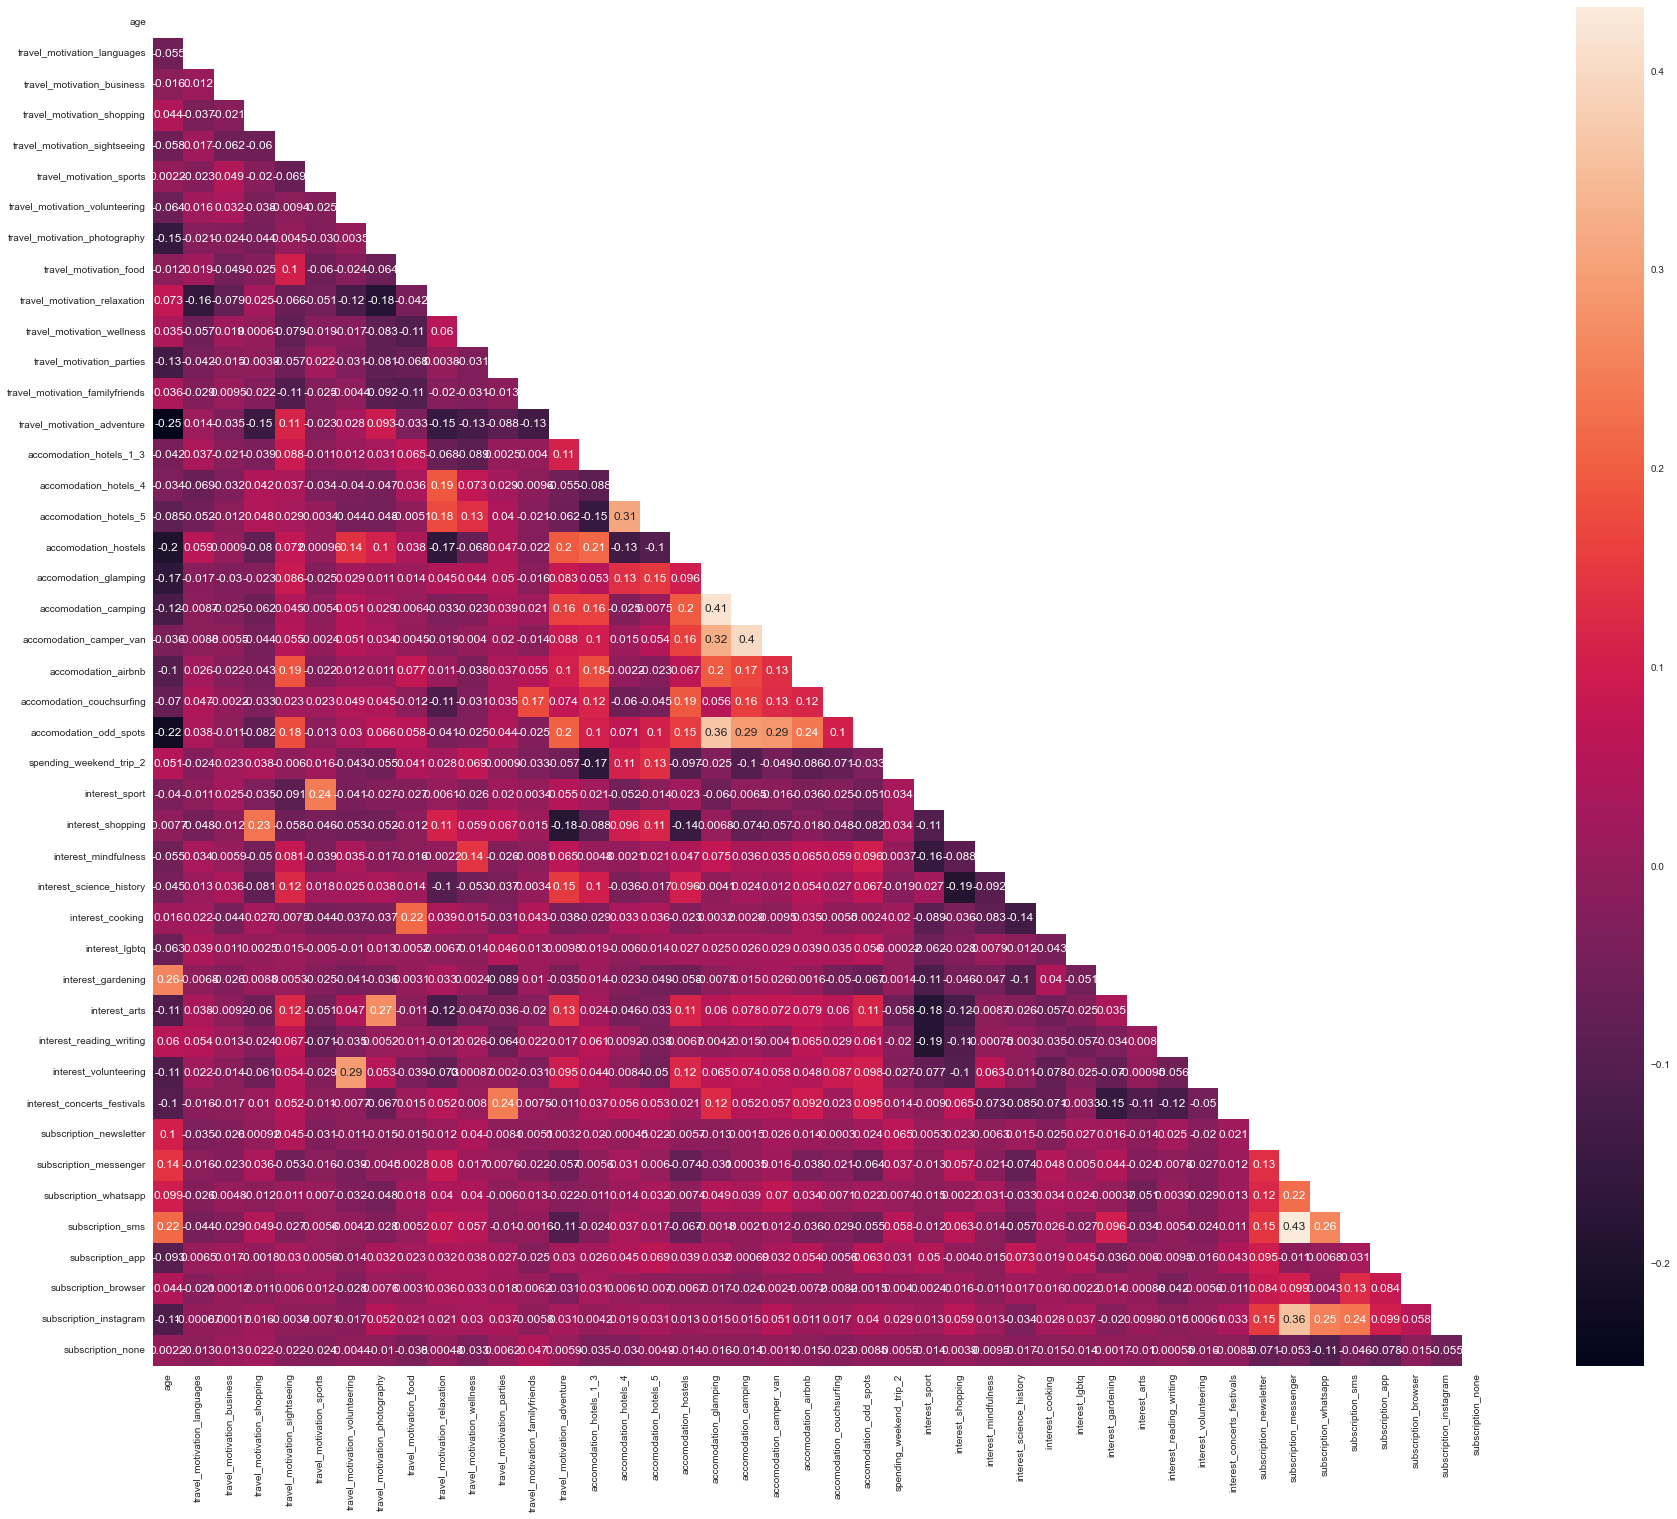

In [54]:
# Getting correlation among features

corr_matrix=data2.corr(method='pearson')

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(30, 25))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

There is not a very high correlation between features. We do see a higher correlation between types of accomodation (camping, camper van, glamping and odd spots), which make sense due to heir similarities, but still, no a very high correlation.

There is also some correlation among customers who receive notification from Messenger, WhatsApp and Instagram, which also makes sense.

In [55]:
# Getting correlation between features and target variable. There is not a very high correlation.

data2.corr()['spending_weekend_trip_2'].sort_values(ascending=False)    

spending_weekend_trip_2            1.000000
accomodation_hotels_5              0.132791
accomodation_hotels_4              0.106031
travel_motivation_wellness         0.069153
subscription_newsletter            0.065062
subscription_sms                   0.058474
age                                0.051054
travel_motivation_food             0.041243
travel_motivation_shopping         0.037530
subscription_messenger             0.037146
interest_sport                     0.034092
interest_shopping                  0.033585
subscription_app                   0.031186
subscription_instagram             0.029178
travel_motivation_relaxation       0.027704
travel_motivation_business         0.023097
interest_cooking                   0.020133
travel_motivation_sports           0.015686
interest_concerts_festivals        0.014136
subscription_whatsapp              0.007417
subscription_browser               0.004042
interest_mindfulness               0.003700
interest_gardening              

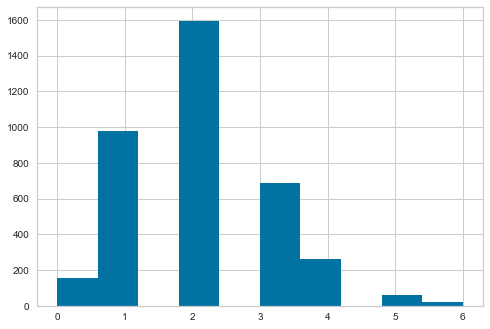

In [56]:
# Customers are concentrated around people who spend between £50 and £299

data2["spending_weekend_trip_2"].hist()
plt.show()

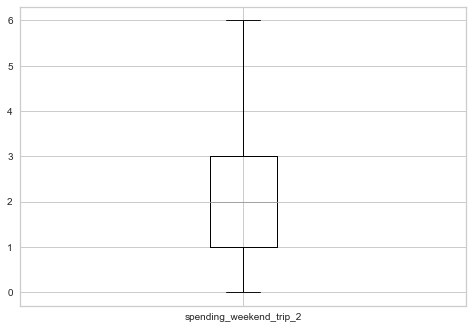

In [57]:
data2[["spending_weekend_trip_2"]].boxplot()
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

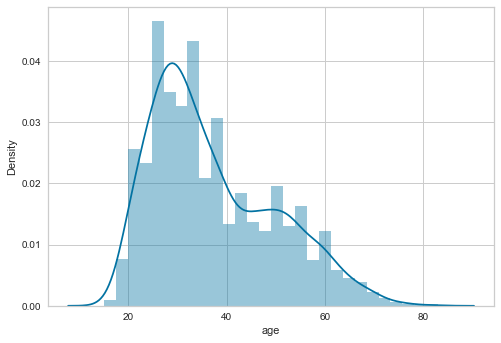

In [58]:
# We have more young respondents

sns.distplot(data2['age'])

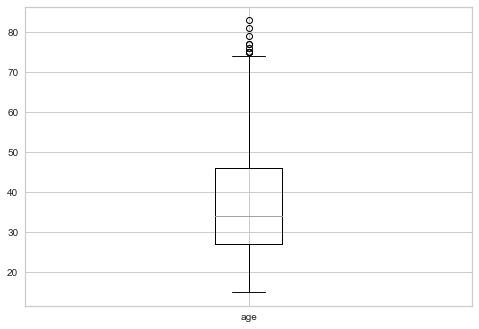

In [59]:
# Customers are concentrated between their late 20's and mid 40's

data2[["age"]].boxplot()
plt.show()

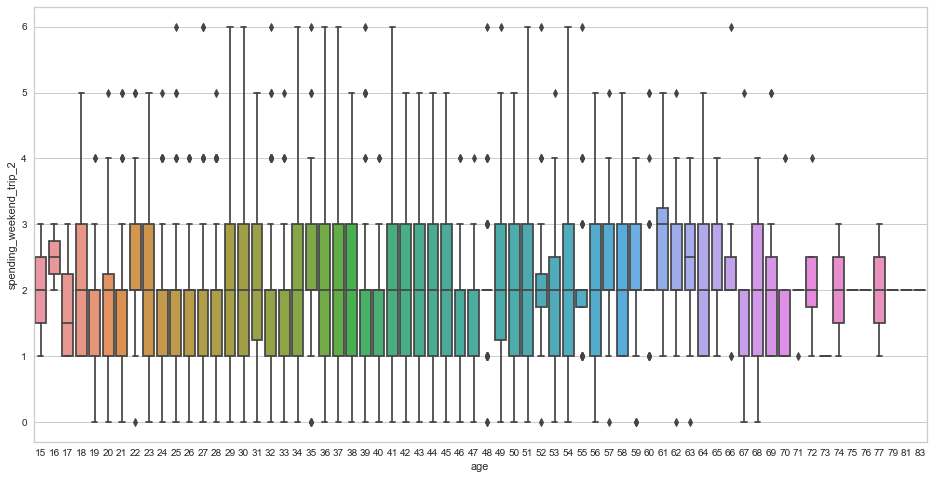

In [60]:
# Customers inclined to spend the highest amount are concentrated between ages of 29 to 54. Older respondents
# seem to be willing to spend more around the average for the target. We also have some under 24 years of age 
# customers willing to spend more, so understanding this group better would be interesting for the company. 

plt.figure(figsize=(16,8))

sns.boxplot(x='age', y='spending_weekend_trip_2', data=data2)
plt.show()

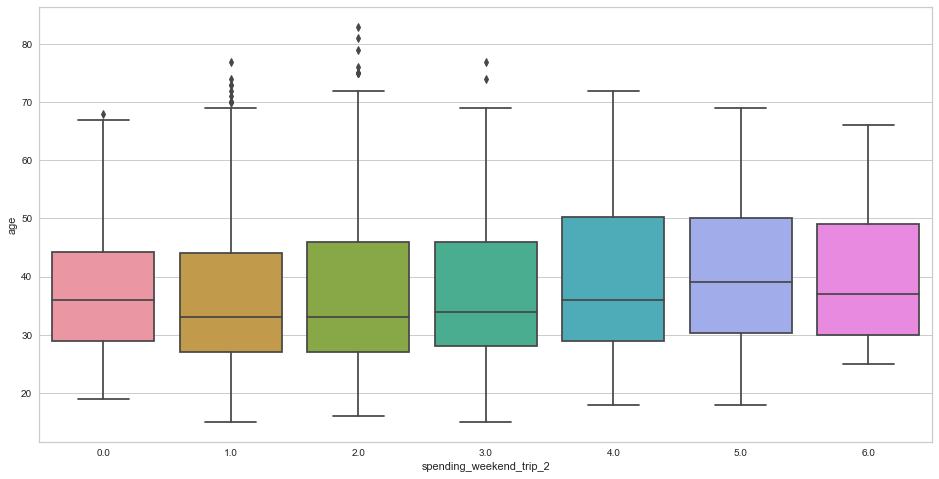

In [61]:
plt.figure(figsize=(16,8))

sns.boxplot(x='spending_weekend_trip_2', y='age', data=data2)
plt.show()

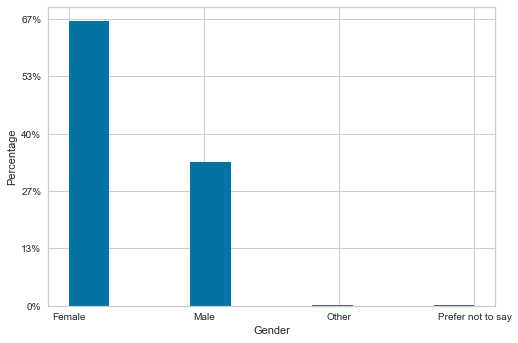

In [62]:
# Almost 70% of respondents are female

fig, ax = plt.subplots()
ax.hist(data2["gender"]) 
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data2["gender"])))

<AxesSubplot:xlabel='spending_weekend_trip_2', ylabel='count'>

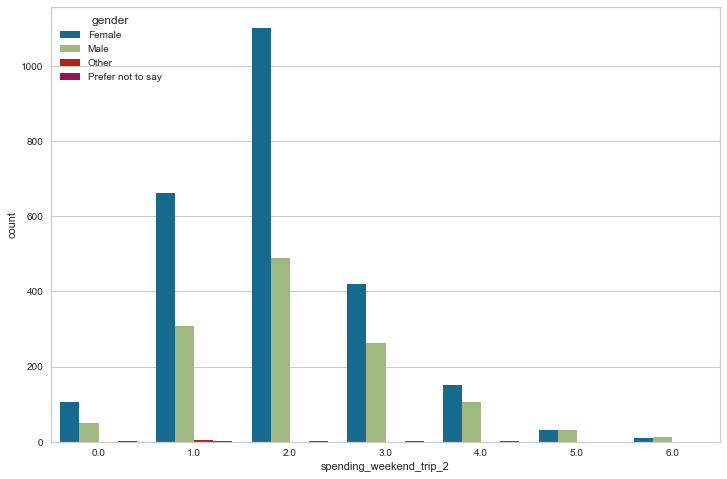

In [63]:
# In the highest brackets of spending, the difference between genders tend to minimize.

plt.figure(figsize=(12,8))
sns.countplot(x="spending_weekend_trip_2", hue="gender", data=data2)

<AxesSubplot:xlabel='spending_weekend_trip_2', ylabel='count'>

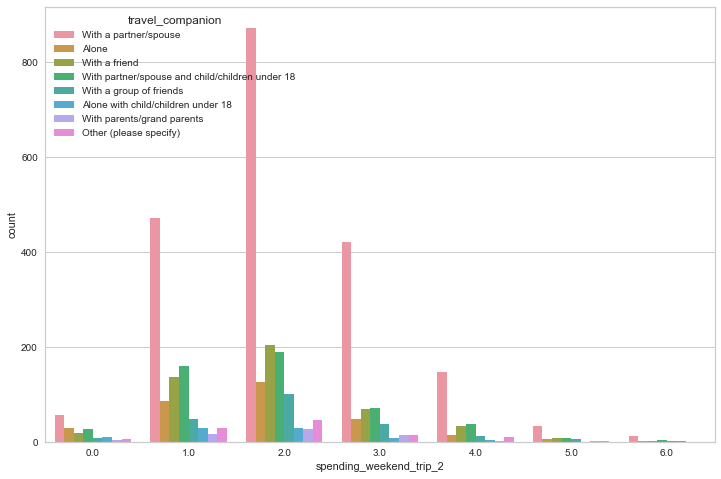

In [64]:
# Travelling with partner/spouse fit the majority of respondents, and travelling with friends or partner/spouse 
# with children comes after. In the two highest brackets for spending, travelling alone appears to equalize
# as an option with with friends and partner/spouse with children.

plt.figure(figsize=(12,8))
sns.countplot(x="spending_weekend_trip_2", hue="travel_companion", data=data2)

<AxesSubplot:xlabel='spending_weekend_trip_2', ylabel='count'>

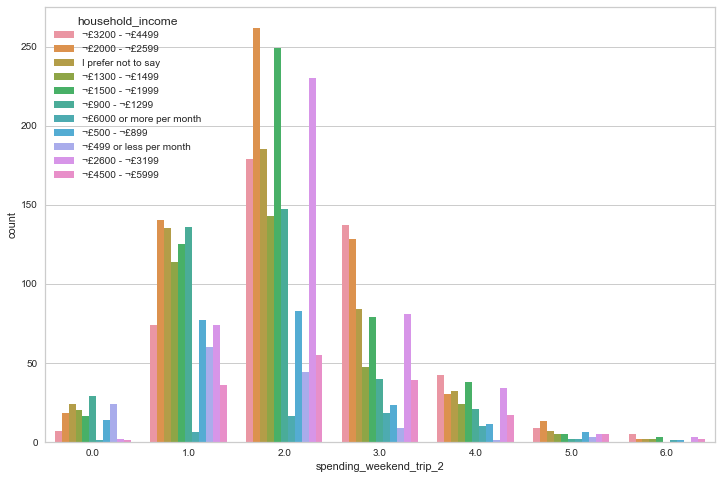

In [65]:
# Household income impacts the spending on a trip. Among brackets 1 and 2 of spending (between £50 and £199),
# people who make between £1500 and £2599 are majority, with respondents who make £2600 and £3199/month emerging 
# high on bracket 2. 

# On brackets 3 and 4 of spending(between £200 and £499), customers who make £3200 and £4499/month are dominant.

# Contrary to common sense, people who make more money (above £4500) are not the majority on brackets 5 and 6 
# (willing to spend above £500). Those who make more then £6000 are more present in bracket 3 (£200 to £299).

plt.figure(figsize=(12,8))
sns.countplot(x="spending_weekend_trip_2", hue="household_income", data=data2)

<AxesSubplot:xlabel='spending_weekend_trip_2', ylabel='count'>

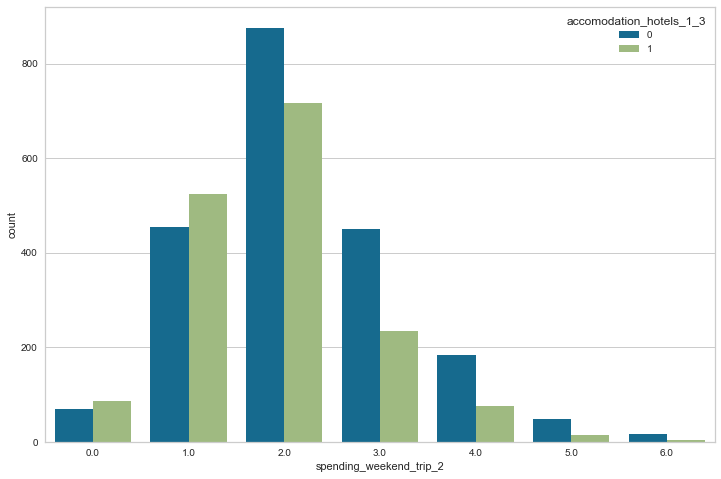

In [66]:
# Accomodation in hotels 1-3 stars is the most important feature tho the model. We can see that in brackets 0 
# and 1 of spending (under £100 for a weekend for two), people who chooses this type of accomodation surpasses 
# those who do not.

plt.figure(figsize=(12,8))
sns.countplot(x="spending_weekend_trip_2", hue="accomodation_hotels_1_3", data=data2)

<AxesSubplot:xlabel='spending_weekend_trip_2', ylabel='count'>

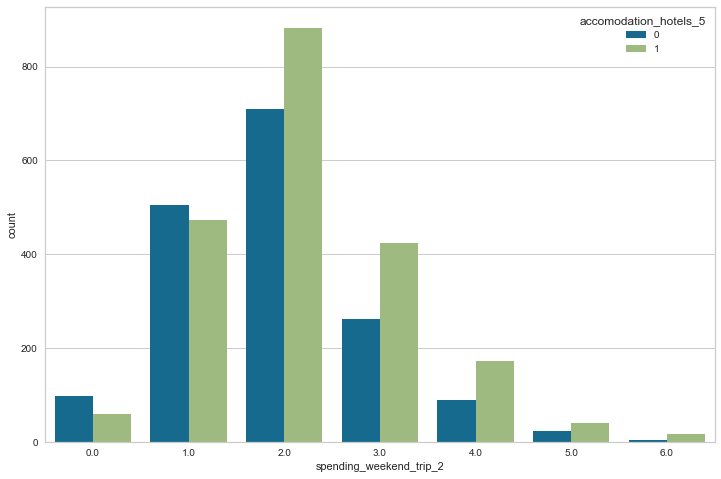

In [67]:
# Accomodation in 5 stars hotels (another important feature), on the contrary, have only people who are in 
# brackets 2 and above (spending more then £100 for a weekend for two) choosing this type of accomodation more.
# In brackets  2 and 3 (£100 to £299) we see the difference between those who choose these hotels and the ones 
# who don't at its highest. Again, making more money doen't seem to have a direct impact on choosing more 
# spensive types of accomodation.

plt.figure(figsize=(12,8))
sns.countplot(x="spending_weekend_trip_2", hue="accomodation_hotels_5", data=data2)

<AxesSubplot:xlabel='spending_weekend_trip_2', ylabel='count'>

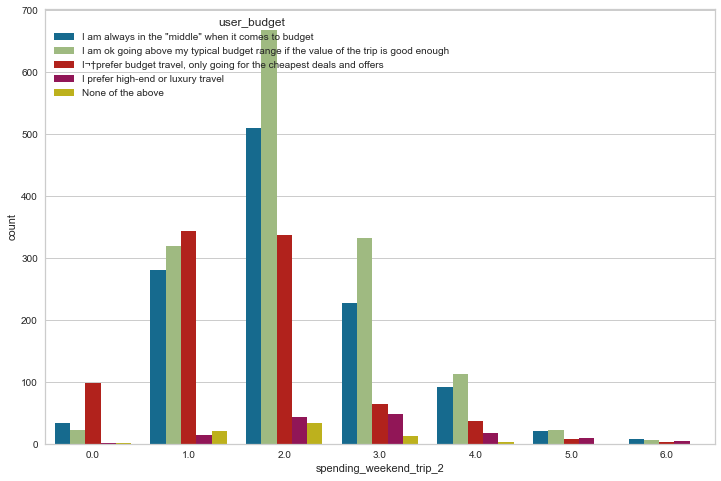

In [68]:
# Budget travellers (those who prefer the cheapest deals) is the second most important feature. These customers
# are the majority in bracket 0 and 1 of spending (under £100 for a weekend for two). Even though the company's
# focus is on cheap deals, customers are more inclined to go above their budget if they see a good value for money
# on a travel package.

plt.figure(figsize=(12,8))
sns.countplot(x="spending_weekend_trip_2", hue="user_budget", data=data2)

# 3: Clustering Model

In [69]:
data3 = data.copy()

X = pd.get_dummies(data3)

## PCA

In [70]:
# Using PCA form dimentionality reduction

scaler = MinMaxScaler().fit(X)
X_ = scaler.transform(X)

pca = PCA(n_components=.95, random_state=42) 
X_pca = pca.fit_transform(X_)

In [71]:
X_pca.shape

(3754, 115)

## Kmeans model

In [72]:
# Function to get the best K

def cluster_best_KMeans(X, n_clusters=range(2, 20)):
    K = n_clusters
    inertia = []
    silhouette = []
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        pred = kmeans.predict(X)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(X, pred))

    return inertia, silhouette

In [73]:
inertia, silhouette = cluster_best_KMeans(X_pca)

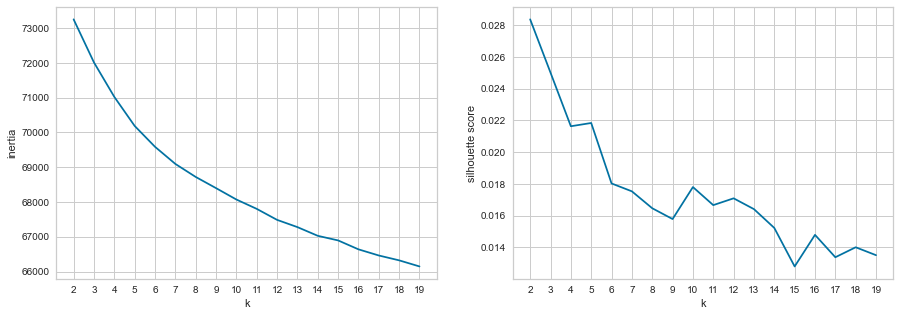

In [74]:
# Plotting inertia and silhouette

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
K = range(2, 20) 
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))

ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))

plt.show()

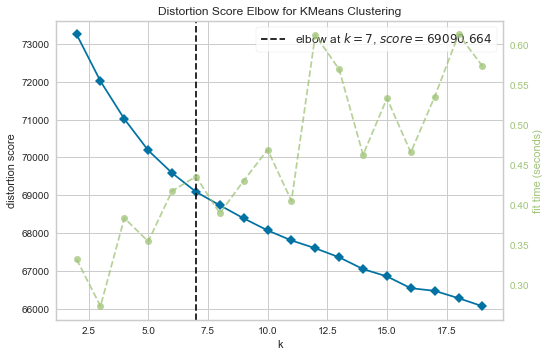

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
# Getting the best k with KElbow visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_pca)       
visualizer.show()  

In [76]:
# K-means with K = 7

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=7, random_state=42)

In [77]:
clusters = kmeans.predict(X_pca)

In [78]:
pd.Series(clusters).value_counts().sort_index()

0    477
1    493
2    569
3    567
4    667
5    456
6    525
dtype: int64

In [79]:
# Making data in 2D for visualization

pca = PCA(2) 
X_2D = pca.fit_transform(X_pca)

In [80]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_2D)

KMeans(n_clusters=7, random_state=42)

In [81]:
clusters_2D = kmeans.predict(X_2D)

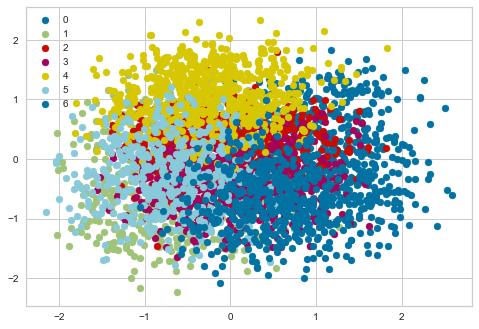

In [82]:
labels = np.unique(clusters_2D)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [83]:
# Adding clusters to database 

X_df = pd.DataFrame(data3)
X_df["cluster"] = clusters

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2 if x == 3 else 3 if x == 4 else 4 if x == 5 else 5 if x == 6 else 6)
X_df

,gender,age,knowledge_company,visit_frequency,knowledge_activity,satisfaction,booking_frequency,booking_preference,user_budget,travel_motivation_languages,...,marital_status,subscription_newsletter,subscription_messenger,subscription_whatsapp,subscription_sms,subscription_app,subscription_browser,subscription_instagram,subscription_none,cluster
respondent_id,,,,,,,,,,,,,,,,,,,,,
10605313822,Female,69,Google web search,Every day,know,Satisfied,Twice,Always online,"I am always in the ""middle"" when it comes to b...",0,...,Married and/or living with partner,0,0,0,0,0,0,0,0,2
10605280047,Female,23,Friends/Family told me about it directly,A few times per month,know it wrong,Satisfied,"0 - I'm not a newbie, but haven't found/booked...",Always online,I am ok going above my typical budget range if...,0,...,Married and/or living with partner,0,0,0,0,0,0,0,0,2
10605004033,Female,24,Friends/Family told me about it directly,A few times per month,know,Satisfied,Once,Always online,"I¬†prefer budget travel, only going for the ch...",1,...,Never married/single,0,0,0,0,0,0,0,0,6
10604334453,Female,24,Google web search,A few times per week,know,Very satisfied,0 - I'm a newbie to HolidayPirates,Always online,I am ok going above my typical budget range if...,0,...,I prefer not to say,0,0,0,0,0,0,0,0,5
10604300828,Female,46,Google web search,A few times per month,know,Satisfied,3 - 4 times,Sometimes online and sometimes offline,"I am always in the ""middle"" when it comes to b...",0,...,Married and/or living with partner,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538944302,Male,35,Friends/Family told me about it directly,Every day,know,Very dissatisfied,Twice,Sometimes online and sometimes offline,"I¬†prefer budget travel, only going for the ch...",0,...,Married and/or living with partner,1,0,1,0,0,0,0,0,3
10538923163,Male,23,Friends/Family told me about it directly,A few times per week,know,Very satisfied,Once,Always online,I am ok going above my typical budget range if...,0,...,Never married/single,0,0,0,0,0,0,0,0,3
10538922600,Female,23,Facebook,A few times per month,know,Satisfied,0 - I'm a newbie to HolidayPirates,Always online,"I am always in the ""middle"" when it comes to b...",0,...,Married and/or living with partner,0,0,0,0,0,0,0,0,4
